<a href="https://colab.research.google.com/github/ShrikantSarode/Shack_Labs_Assignments/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Predict the price of a house**

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, for reading csv file(s).
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import seaborn as sb # For visualization.
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split # For splitting the dataset.
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score # For cross validation.
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import pathlib


# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Any results you write to the current directory are saved as output.

In [21]:
dataset_path = "/content/drive/MyDrive/HousepriceDataset/DS.xlsx"
dataset_dir = pathlib.Path(dataset_path)

In [22]:
from google.colab import drive

In [23]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
import pandas as pd

In [ ]:
from google.colab import files


uploaded = files.upload()


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
df=pd.read_csv('/content/HousePrice.csv')

In [ ]:
df

# Data Cleaning

In [27]:
df.head(11)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,3,828,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,3,1115,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,3,1316,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,1,588,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,2,1075,22.1


In [39]:
df.tail() # Printing last 5 rows of train dataset.

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5
413,2013.500,6.5,90.45606,9,24.97433,121.54310,2,1097,63.9


In [41]:
#Check the shape of dataframe
df.shape

(414, 9)

In [43]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [44]:
df.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [45]:
# Identifying the unique number of values in the dataset
df.nunique()

Transaction date                             12
House Age                                   236
Distance from nearest Metro station (km)    259
Number of convenience stores                 11
latitude                                    234
longitude                                   232
Number of bedrooms                            3
House size (sqft)                           328
House price of unit area                    270
dtype: int64

In [46]:
# Check for missing values
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [47]:
# See rows with missing values
df[df.isnull().any(axis=1)]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area


In [48]:
# Viewing the data statistics
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [49]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(9, 9)

# Correlation between features

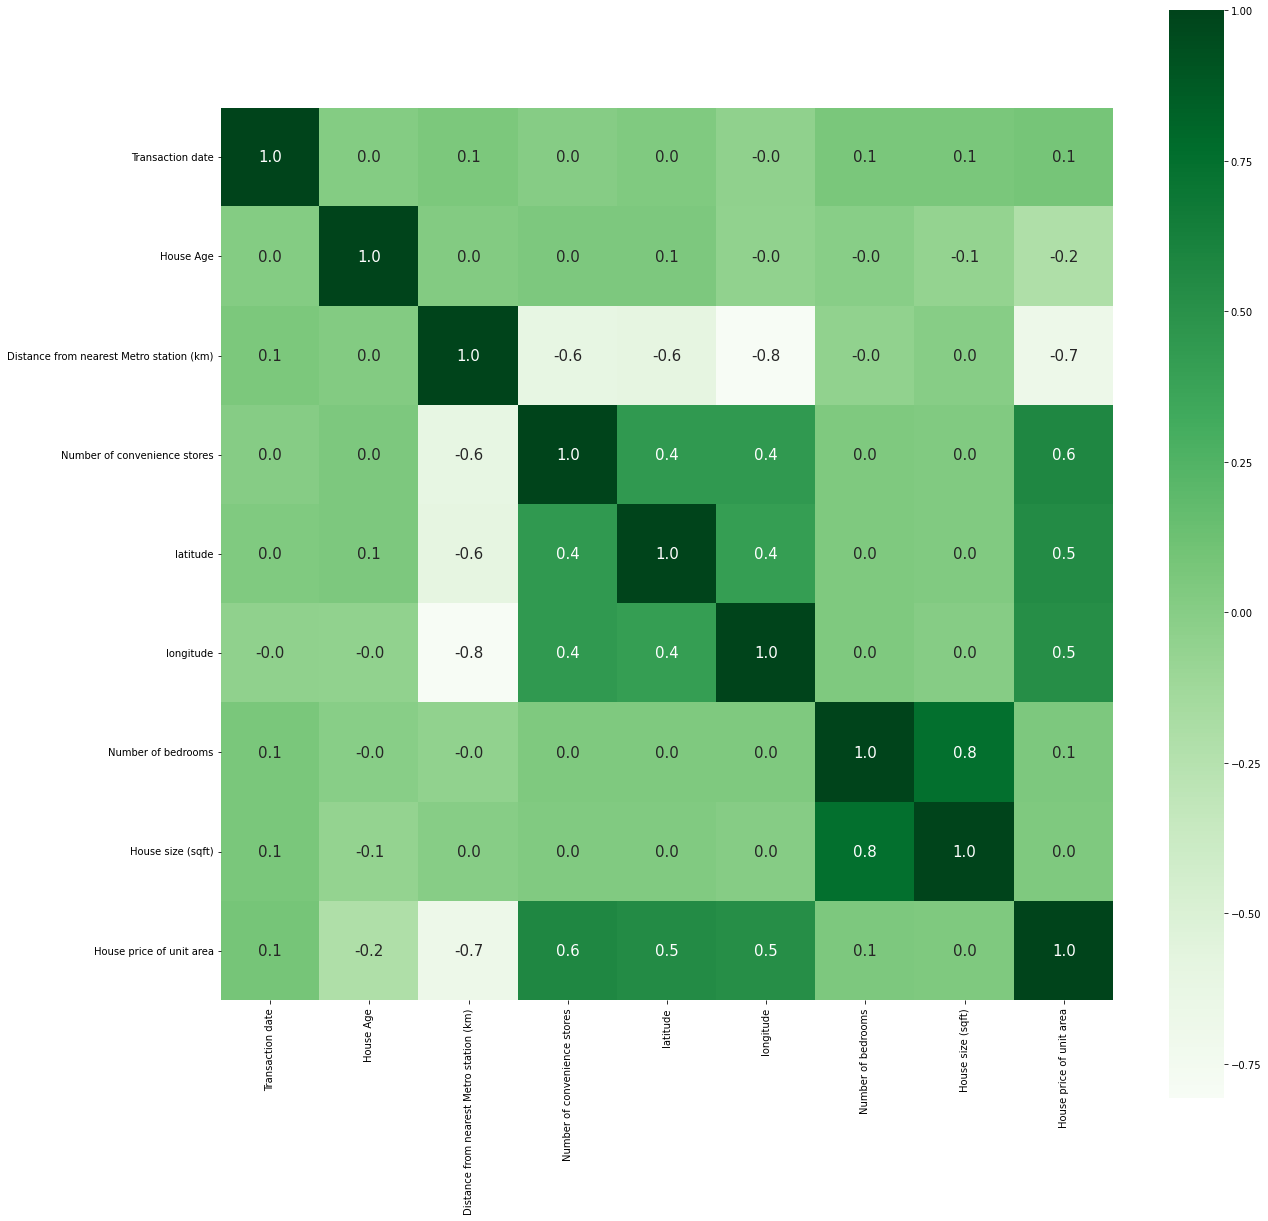

In [50]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [53]:
# Spliting target variable and independent variables
X = df.drop(['House price of unit area'], axis = 1)
y = df['House price of unit area']

In [54]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Linear regression
Training the model

In [55]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [56]:
# Value of y intercept
lm.intercept_

-10834.527214186743

In [57]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,Transaction date,4.565107
1,House Age,-0.279333
2,Distance from nearest Metro station (km),-0.004523
3,Number of convenience stores,0.841949
4,latitude,251.364314
5,longitude,-37.751672
6,Number of bedrooms,0.120279
7,House size (sqft),0.000086


# Model Evaluation

In [58]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [59]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5784010240500812
Adjusted R^2: 0.5663553390229408
MAE: 5.773886253651884
MSE: 73.73262377499854
RMSE: 8.586770276128187


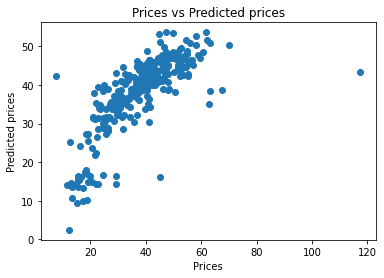

In [60]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

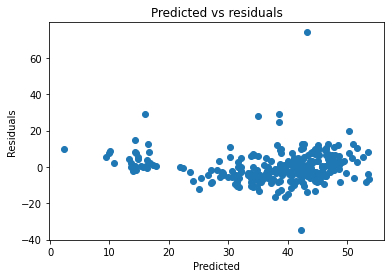

In [61]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

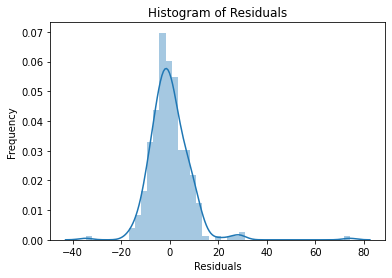

In [62]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# For test data

In [63]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [64]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


R^2: 0.5744498781818257
Adjusted R^2: 0.5451015939185033
MAE: 6.948684507226561
MSE: 88.03675410979386
RMSE: 9.382790315774614


#Random Forest Regressor
Train the model

In [65]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
# Model prediction on train data
y_pred = reg.predict(X_train)

# Model Evaluation

In [67]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9346485409908745
Adjusted R^2: 0.9327813564477566
MAE: 1.9662629757785475
MSE: 11.429189384083045
RMSE: 3.3807084145313455


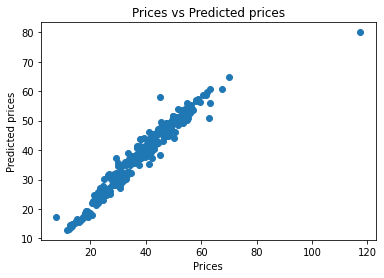

In [68]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

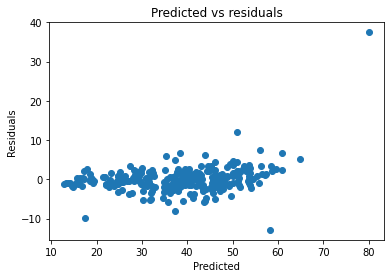

In [69]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# For test data

In [70]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)


In [71]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7669679299574965
Adjusted R^2: 0.7508967527131859
MAE: 4.557439999999997
MSE: 48.20909687999995
RMSE: 6.943277099468229


#XGBoost Regressor
Training the model

In [72]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

[10:41:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# Model Evaluation

In [73]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [74]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.921557581111602
Adjusted R^2: 0.9193163691433621
MAE: 2.6095645713146167
MSE: 13.718641860710154
RMSE: 3.7038684993814446


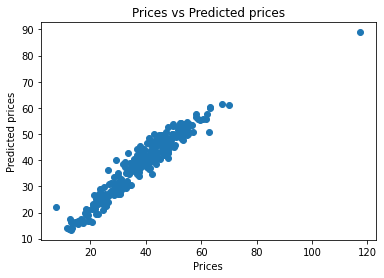

In [75]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

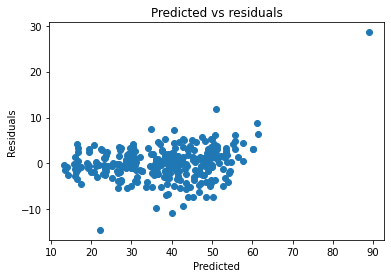

In [76]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#For test data

In [77]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [78]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7686793449496581
Adjusted R^2: 0.7527261963254965
MAE: 4.723481440734863
MSE: 47.855043589635436
RMSE: 6.917733992402096


#SVM Regressor

In [79]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

#Train the model

In [81]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

In [82]:
# Model prediction on train data
y_pred = reg.predict(X_train)

#Model Evaluation

In [83]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5574849334457774
Adjusted R^2: 0.5448416458299425
MAE: 5.707710570768073
MSE: 77.39059812348012
RMSE: 8.79719262739427


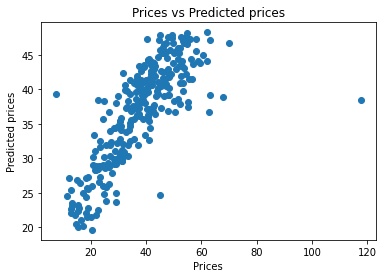

In [84]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

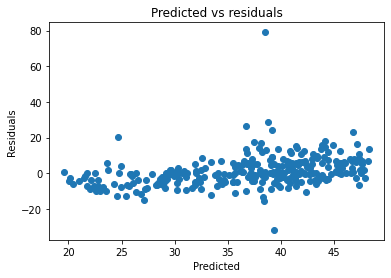

In [85]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#For test data

In [86]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [87]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5047415786691896
Adjusted R^2: 0.4705858254739612
MAE: 7.059481787112862
MSE: 102.45783428099855
RMSE: 10.122145735020739


#Evaluation and comparision of all the models

In [88]:
#Evaluation and comparision of all the models

models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,76.867934
1,Random Forest,76.696793
0,Linear Regression,57.444988
3,Support Vector Machines,50.474158


#Hence XGBoost Regression works the best for this dataset.